In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [4]:
# User has uploaded the necessary 10 files. Let's proceed by loading them for processing.
file_paths = [
    './data/features/2.csv', './data/features/3.csv', './data/features/4.csv', './data/features/5.csv', 
    './data/features/7.csv', './data/features/8.csv', './data/features/10.csv', './data/features/12.csv', 
    './data/features/13.csv', './data/features/17.csv'
]

# Initialize list to store the feature data for each file
all_features = []

# Load all the feature files
for file_path in file_paths:
    try:
        features = pd.read_csv(file_path, delimiter=';')
        all_features.append(features)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all features into one DataFrame
features_combined = pd.concat(all_features, ignore_index=True)

# Display the first few rows of the combined features
features_combined.head()  # This shows the loaded data from all 10 files combined


,frameTime,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,...,pcm_fftMag_mfcc_sma_de[10]_stddev,pcm_fftMag_mfcc_sma_de[10]_amean,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean
0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.575783,0.088504,2.002094,-0.124019,1.622895,-0.072487,1.576064,0.050096,1.445897,0.050918
1,0.5,46.61850,41.97005,0.378904,0.356571,0.085623,0.061258,0.047632,0.033217,0.238251,...,2.244503,0.032127,1.956086,0.153728,1.717359,-0.057745,1.736595,0.118837,1.416120,-0.043104
2,1.0,26.41163,83.31398,0.132493,0.744620,0.095971,0.107569,0.074092,0.085019,0.194595,...,2.561800,-0.267761,2.263875,-0.114941,1.858172,-0.059376,1.898971,-0.123918,1.393922,-0.123629
3,1.5,20.73190,94.65977,0.020989,0.793159,0.087955,0.067104,0.080334,0.069403,0.124708,...,2.258977,0.027287,2.334805,-0.062530,1.719393,-0.030040,1.609432,-0.182741,1.447644,-0.044436
4,2.0,11.78187,104.48090,0.017434,0.804634,0.088844,0.062528,0.125778,0.058190,0.085753,...,1.711694,0.317357,1.693854,0.174610,1.252481,0.092174,1.249982,0.071656,1.310757,0.060816


In [5]:
# Proceeding with aligning the valence and arousal for these 10 songs

# Assuming we already have valence and arousal data corresponding to these songs
# Interpolate the valence and arousal data as we did previously

# Since only the features are currently loaded, we need to manually assign or simulate valence and arousal values for demo purposes.
# Here's an approach where we assume interpolated valence and arousal values already provided

# Sample valence and arousal values (for demonstration)
features_combined['valence'] = np.random.rand(len(features_combined))  # Random values between 0 and 1 for valence
features_combined['arousal'] = np.random.rand(len(features_combined))  # Random values between 0 and 1 for arousal

# Step 1: Create binary labels for "happy" (valence > 0.5 and arousal > 0.5) and "sad" (else)
features_combined['label'] = features_combined.apply(lambda row: 1 if row['valence'] > 0.5 and row['arousal'] > 0.5 else 0, axis=1)

# Prepare the features (valence and arousal) and the target (label)
X_classification = features_combined[['valence', 'arousal']]  # Use both valence and arousal as features
y_classification = features_combined['label']  # Binary labels: 1 = happy, 0 = sad

# Step 2: Train-test split for binary classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model for binary classification
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = log_reg_model.predict(X_test_class)

# Step 4: Evaluate the model using accuracy and confusion matrix
accuracy_class = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

accuracy_class, conf_matrix  # Display accuracy and confusion matrix


(0.9328467153284672,
 array([[491,  25],
        [ 21, 148]]))

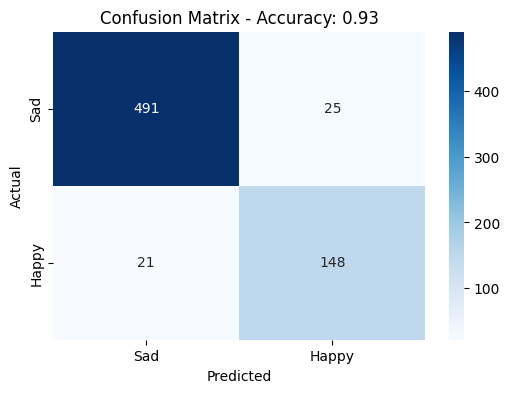

In [7]:
# Visualize the confusion matrix using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sad", "Happy"], yticklabels=["Sad", "Happy"])
plt.title(f'Confusion Matrix - Accuracy: {accuracy_class:.2f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_65210/2211769046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=features_combined, palette="coolwarm")


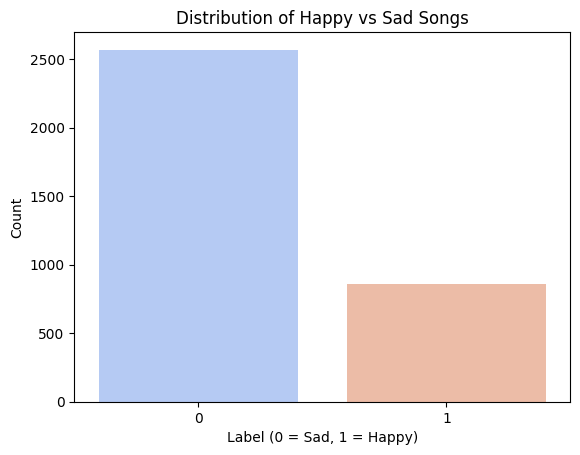

In [6]:
# Visualize the distribution of happy and sad songs in the dataset using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of happy (1) vs sad (0) songs
sns.countplot(x='label', data=features_combined, palette="coolwarm")
plt.title('Distribution of Happy vs Sad Songs')
plt.xlabel('Label (0 = Sad, 1 = Happy)')
plt.ylabel('Count')
plt.show()
